In [2]:
import pandas as pd

In [ ]:
data = pd.read_csv("../data/data_prep/2019-22_drafted.csv")

data.head()

,player,pos,school,wt,40yd,vertical,bench,broad jump,3cone,shuttle,ht_num,round
0,Hakeem Adeniji,OL,Kansas,302,5.17,34.0,26,115,NaN,NaN,6.333333,6.0
1,McTelvin Agim,DL,Arkansas,309,4.98,NaN,27,NaN,NaN,NaN,6.250000,3.0
2,Brandon Aiyuk,WR,Arizona State,205,4.50,40.0,11,128,NaN,NaN,6.000000,1.0
3,Cam Akers,RB,Florida State,217,4.47,35.5,20,122,NaN,4.42,5.833333,2.0
4,Bradlee Anae,DL,Utah,257,4.93,31.0,25,115,7.44,4.43,6.250000,5.0


In [6]:
df = data.drop(["player","school", "pos"], axis=1)
df.head()

,wt,40yd,vertical,bench,broad jump,3cone,shuttle,ht_num,round
0,302,5.17,34.0,26,115,NaN,NaN,6.333333,6.0
1,309,4.98,NaN,27,NaN,NaN,NaN,6.250000,3.0
2,205,4.50,40.0,11,128,NaN,NaN,6.000000,1.0
3,217,4.47,35.5,20,122,NaN,4.42,5.833333,2.0
4,257,4.93,31.0,25,115,7.44,4.43,6.250000,5.0


In [7]:
df.dtypes

wt             object
40yd           object
vertical       object
bench          object
broad jump     object
3cone          object
shuttle        object
ht_num        float64
round         float64
dtype: object

In [10]:
df.to_csv("2019-22_Draft_train_Data.csv", index=False)

In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 4 to 646
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wt          179 non-null    object 
 1   40yd        179 non-null    object 
 2   vertical    179 non-null    object 
 3   bench       179 non-null    object 
 4   broad jump  179 non-null    object 
 5   3cone       179 non-null    object 
 6   shuttle     179 non-null    object 
 7   ht_num      179 non-null    float64
 8   round       179 non-null    float64
dtypes: float64(2), object(7)
memory usage: 14.0+ KB


In [24]:
df = df.astype(float)

In [25]:
df.corr()

,wt,40yd,vertical,bench,broad jump,3cone,shuttle,ht_num,round
wt,1.000000,0.909373,-0.716644,0.737611,-0.747708,0.784593,0.783018,0.762644,-0.212135
40yd,0.909373,1.000000,-0.767417,0.618613,-0.827464,0.824921,0.797486,0.672751,-0.061574
vertical,-0.716644,-0.767417,1.000000,-0.427920,0.804891,-0.678474,-0.669549,-0.567935,0.007039
bench,0.737611,0.618613,-0.427920,1.000000,-0.499060,0.506998,0.483601,0.421764,-0.174885
broad jump,-0.747708,-0.827464,0.804891,-0.499060,1.000000,-0.678678,-0.679755,-0.496249,-0.044023
3cone,0.784593,0.824921,-0.678474,0.506998,-0.678678,1.000000,0.874011,0.525760,-0.059073
shuttle,0.783018,0.797486,-0.669549,0.483601,-0.679755,0.874011,1.000000,0.612502,-0.098325
ht_num,0.762644,0.672751,-0.567935,0.421764,-0.496249,0.525760,0.612502,1.000000,-0.201231
round,-0.212135,-0.061574,0.007039,-0.174885,-0.044023,-0.059073,-0.098325,-0.201231,1.000000


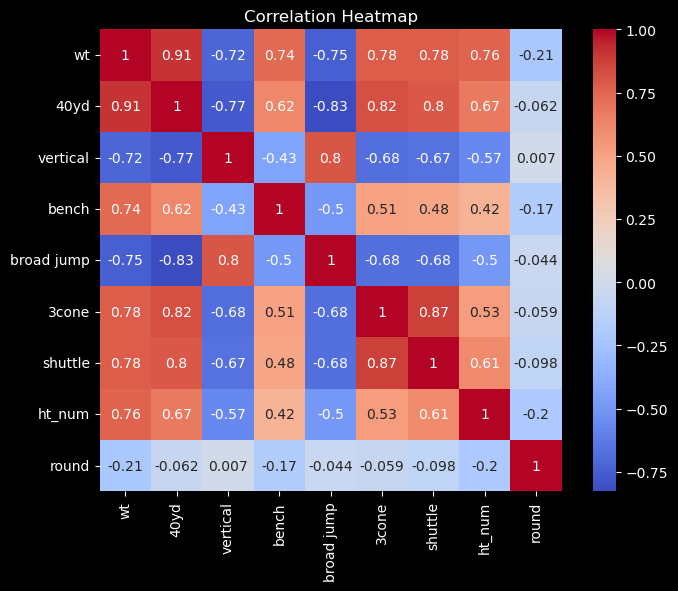

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

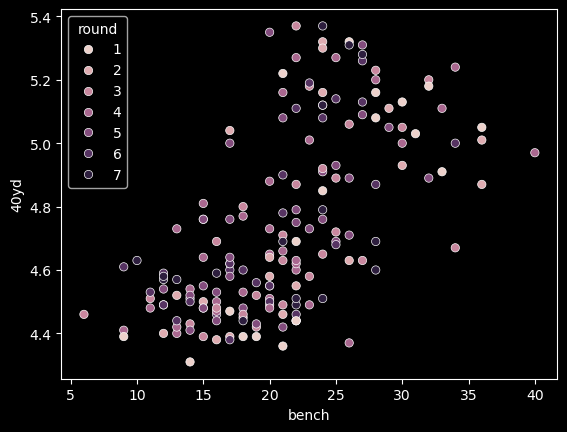

In [32]:
sns.scatterplot(x="bench", y="40yd", hue='round',data=df)
plt.show()

In [ ]:
df.groupby("round")["nfl_av"].sum()

round
1    483
2    260
3    334
4    182
5     80
6      0
7      0
Name: nfl_av, dtype: int64

In [ ]:
df.head()

,player,wt,40yd,vertical,bench,broad_jump,3cone,shuttle,round,nfl_av,ht_num
0,Dakota Allen,232,4.77,31.5,23.0,116.0,6.88,4.04,7,0,6.083333
1,Zach Allen,281,5.00,32.0,24.0,112.0,7.34,4.36,3,35,6.333333
2,Ugo Amadi,199,4.51,32.5,18.0,115.0,7.21,4.19,4,8,5.750000
3,Ryquell Armstead,220,4.45,30.0,22.0,114.0,7.02,4.29,5,2,5.916667
4,Ben Banogu,250,4.62,40.0,23.0,134.0,7.02,4.27,2,4,6.250000


In [ ]:
nfl_av = pd.read_csv("./Data/Train_Data/2019-22_AV.csv")
nfl_av.head()

,Year,Player,Career AV
0,2020,Trey Adams,0
1,2020,Hakeem Adeniji,0
2,2020,McTelvin Agim,2
3,2020,Salvon Ahmed,0
4,2020,Brandon Aiyuk,39


In [ ]:
nfl_av.columns.str.lower()

Index(['year', 'player', 'career av'], dtype='object')

In [ ]:
nfl_av.head()

,Year,Player,Career AV
0,2020,Trey Adams,0
1,2020,Hakeem Adeniji,0
2,2020,McTelvin Agim,2
3,2020,Salvon Ahmed,0
4,2020,Brandon Aiyuk,39


In [ ]:
nfl_av.columns = [col.lower() for col in nfl_av.columns]

In [ ]:
nfl_av.head()

,year,player,career av
0,2020,Trey Adams,0
1,2020,Hakeem Adeniji,0
2,2020,McTelvin Agim,2
3,2020,Salvon Ahmed,0
4,2020,Brandon Aiyuk,39


In [ ]:
draft = df.merge(nfl_av, on="player", how="left")

In [ ]:
draft

,player,wt,40yd,vertical,bench,broad_jump,3cone,shuttle,round,nfl_av,ht_num,year,career av
0,Dakota Allen,232,4.77,31.5,23.0,116.0,6.88,4.04,7,0,6.083333,NaN,NaN
1,Zach Allen,281,5.00,32.0,24.0,112.0,7.34,4.36,3,35,6.333333,NaN,NaN
2,Ugo Amadi,199,4.51,32.5,18.0,115.0,7.21,4.19,4,8,5.750000,NaN,NaN
3,Ryquell Armstead,220,4.45,30.0,22.0,114.0,7.02,4.29,5,2,5.916667,NaN,NaN
4,Ben Banogu,250,4.62,40.0,23.0,134.0,7.02,4.27,2,4,6.250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Trayveon Williams,206,4.51,33.0,19.0,121.0,7.44,4.44,6,0,5.666667,NaN,NaN
92,Chase Winovich,256,4.59,30.5,18.0,116.0,6.94,4.11,3,11,6.250000,NaN,NaN
93,Renell Wren,318,5.01,32.0,30.0,118.0,7.65,4.53,4,2,6.416667,NaN,NaN
94,Oshane Ximines,253,4.78,34.0,24.0,118.0,7.13,4.57,3,8,6.250000,NaN,NaN


In [ ]:
df.dropna()

,player,wt,40yd,vertical,bench,broad_jump,3cone,shuttle,round,nfl_av,ht_num
0,Dakota Allen,232,4.77,31.5,23.0,116.0,6.88,4.04,7,0,6.083333
1,Zach Allen,281,5.00,32.0,24.0,112.0,7.34,4.36,3,35,6.333333
2,Ugo Amadi,199,4.51,32.5,18.0,115.0,7.21,4.19,4,8,5.750000
3,Ryquell Armstead,220,4.45,30.0,22.0,114.0,7.02,4.29,5,2,5.916667
4,Ben Banogu,250,4.62,40.0,23.0,134.0,7.02,4.27,2,4,6.250000
...,...,...,...,...,...,...,...,...,...,...,...
91,Trayveon Williams,206,4.51,33.0,19.0,121.0,7.44,4.44,6,0,5.666667
92,Chase Winovich,256,4.59,30.5,18.0,116.0,6.94,4.11,3,11,6.250000
93,Renell Wren,318,5.01,32.0,30.0,118.0,7.65,4.53,4,2,6.416667
94,Oshane Ximines,253,4.78,34.0,24.0,118.0,7.13,4.57,3,8,6.250000


In [ ]:
df.corr()

,wt,40yd,vertical,bench,broad_jump,3cone,shuttle,round,nfl_av,ht_num
wt,1.000000,0.894457,-0.655679,0.652327,-0.693971,0.785289,0.755783,-0.150711,0.046146,0.750099
40yd,0.894457,1.000000,-0.788903,0.496149,-0.793682,0.801234,0.801501,0.058439,-0.102006,0.616651
vertical,-0.655679,-0.788903,1.000000,-0.383302,0.858485,-0.726296,-0.741448,-0.210470,0.229053,-0.353022
bench,0.652327,0.496149,-0.383302,1.000000,-0.435641,0.461876,0.436651,-0.117993,0.116920,0.380484
broad_jump,-0.693971,-0.793682,0.858485,-0.435641,1.000000,-0.719763,-0.724155,-0.124152,0.095246,-0.374702
3cone,0.785289,0.801234,-0.726296,0.461876,-0.719763,1.000000,0.887405,0.005420,-0.053948,0.446794
shuttle,0.755783,0.801501,-0.741448,0.436651,-0.724155,0.887405,1.000000,0.110110,-0.129565,0.441837
round,-0.150711,0.058439,-0.210470,-0.117993,-0.124152,0.005420,0.110110,1.000000,-0.715765,-0.135771
nfl_av,0.046146,-0.102006,0.229053,0.116920,0.095246,-0.053948,-0.129565,-0.715765,1.000000,0.010859
ht_num,0.750099,0.616651,-0.353022,0.380484,-0.374702,0.446794,0.441837,-0.135771,0.010859,1.000000


# Draft 2019 - 2022

Goal: Find which pos are most likely to be strong NFL careers based on the round drafted


In [ ]:
draft_players = pd.read_csv("../Data/Train_Data/2019-22_drafted_players.csv")
draft_players

,player,pos,school,wt,40yd,vertical,bench,broad jump,3cone,shuttle,round,ht_num,year,career av
0,Hakeem Adeniji,OL,Kansas,302,5.17,34.0,26,115,NaN,NaN,6.0,6.333333,2020.0,0.0
1,McTelvin Agim,DL,Arkansas,309,4.98,NaN,27,NaN,NaN,NaN,3.0,6.250000,2020.0,2.0
2,Brandon Aiyuk,WR,Arizona State,205,4.50,40.0,11,128,NaN,NaN,1.0,6.000000,2020.0,39.0
3,Cam Akers,RB,Florida State,217,4.47,35.5,20,122,NaN,4.42,2.0,5.833333,2020.0,13.0
4,Bradlee Anae,DL,Utah,257,4.93,31.0,25,115,7.44,4.43,5.0,6.250000,2020.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Cade York,K,LSU,206,NaN,NaN,12,NaN,NaN,NaN,4.0,6.083333,2022.0,1.0
700,Nick Zakelj,OT,Fordham,316,5.13,28.5,27,110,7.75,4.71,6.0,6.500000,2021.0,0.0
701,Nick Zakelj,OT,Fordham,316,5.13,28.5,27,110,7.75,4.71,6.0,6.500000,2022.0,0.0
702,Bailey Zappe,QB,Western Kentucky,215,4.88,30.0,NaN,109,7.19,4.40,4.0,6.083333,2021.0,2.0


In [51]:
draft_players.dtypes

player         object
pos            object
school         object
wt             object
40yd           object
vertical       object
bench          object
broad jump     object
3cone          object
shuttle        object
round         float64
ht_num        float64
year          float64
career av     float64
dtype: object

In [ ]:
drafted = draft_players.drop(columns=["player", "school", "pos"])

In [ ]:
drafted_17_22 = drafted.rename(columns={"career av": "nfl_av"})

Sum: round
1.0    1998.0
2.0    1566.0
3.0    1184.0
4.0     622.0
5.0       0.0
6.0       0.0
7.0      24.0
Name: nfl_av, dtype: float64
Mean: round
1.0    21.717391
2.0    16.312500
3.0    10.033898
4.0     5.923810
5.0     0.000000
6.0     0.000000
7.0     0.352941
Name: nfl_av, dtype: float64
Median: round
1.0    20.0
2.0    15.0
3.0     7.0
4.0     4.0
5.0     0.0
6.0     0.0
7.0     0.0
Name: nfl_av, dtype: float64


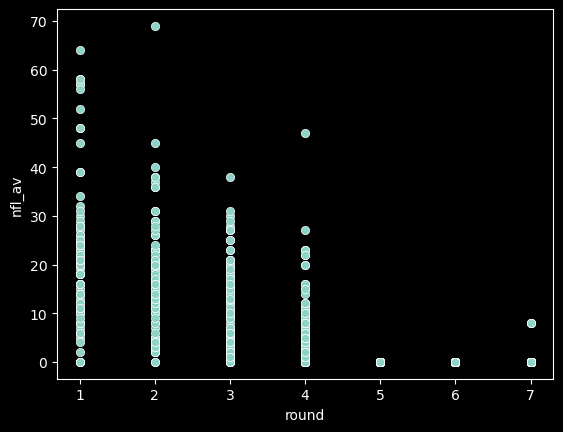

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="round", y="nfl_av", data=drafted_17_22)
print(f"Sum: {drafted_17_22.groupby('round')['nfl_av'].sum()}")
print(f"Mean: {drafted_17_22.groupby('round')['nfl_av'].mean()}")
print(f"Median: {drafted_17_22.groupby('round')['nfl_av'].median()}")
plt.show()

## Looking at Pos


In [55]:
draft_players = draft_players.rename(columns={"career av": "nfl_av"})

In [ ]:
av_pos = draft_players.groupby(["round", "pos"])["nfl_av"].sum()

In [57]:
print(av_pos)

round  pos
1.0    C       25.0
       CB     150.0
       DB      27.0
       DE      90.0
       DL     147.0
              ...  
7.0    QB       0.0
       RB       0.0
       S        0.0
       TE       0.0
       WR       0.0
Name: nfl_av, Length: 121, dtype: float64


In [58]:
av_pos.head(60)

round  pos 
1.0    C        25.0
       CB      150.0
       DB       27.0
       DE       90.0
       DL      147.0
       DT       28.0
       EDGE     62.0
       LB      285.0
       OG       50.0
       OL      233.0
       OLB       0.0
       OT       89.0
       QB      311.0
       RB       42.0
       S        31.0
       TE       21.0
       WR      407.0
2.0    C        41.0
       CB      160.0
       DB       34.0
       DE       22.0
       DL       97.0
       DT        2.0
       EDGE     59.0
       LB       95.0
       OG       33.0
       OL      176.0
       OLB      16.0
       OT       26.0
       QB       69.0
       RB      202.0
       S       229.0
       TE       61.0
       WR      244.0
3.0    C        17.0
       CB       69.0
       DB       53.0
       DE       35.0
       DL      171.0
       DT       13.0
       EDGE      6.0
       LB      218.0
       OG       33.0
       OL      195.0
       OT       43.0
       QB       36.0
       RB       83.0
 

In [ ]:
sorted_draft = av_pos.sort_values(by="nfl_av", ascending=False)

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

<Axes: xlabel='pos', ylabel='nfl_av'>

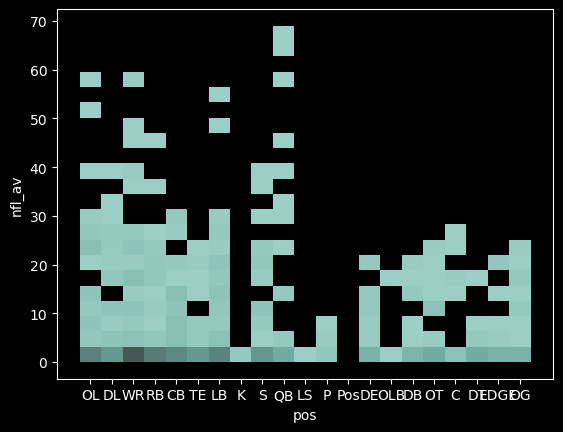

In [ ]:
sns.histplot(data=draft_players, x="pos", y="nfl_av")

From this it looks like over 2019-2022 draftees OL, WR, LB, QB were the positions to have higher NFL AV


In [ ]:
def parse_height(height_str):
    feet, inches = map(int, height_str.split("-"))
    return feet + inches / 12.0


df["ht_num"] = df["ht"].apply(parse_height)

In [ ]:
def avg_av(nfl_av, year):
    years = 2025 - year
    return nfl_av / years if years > 0 else 0  # Avoid division by zero


draft_players["avg_av"] = draft_players.apply(
    lambda x: avg_av(x["nfl_av"], x["year"]), axis=1
)

In [64]:
draft_players

,player,pos,school,wt,40yd,vertical,bench,broad jump,3cone,shuttle,round,ht_num,year,nfl_av,avg_av
0,Hakeem Adeniji,OL,Kansas,302,5.17,34.0,26,115,NaN,NaN,6.0,6.333333,2020.0,0.0,0.000000
1,McTelvin Agim,DL,Arkansas,309,4.98,NaN,27,NaN,NaN,NaN,3.0,6.250000,2020.0,2.0,0.400000
2,Brandon Aiyuk,WR,Arizona State,205,4.50,40.0,11,128,NaN,NaN,1.0,6.000000,2020.0,39.0,7.800000
3,Cam Akers,RB,Florida State,217,4.47,35.5,20,122,NaN,4.42,2.0,5.833333,2020.0,13.0,2.600000
4,Bradlee Anae,DL,Utah,257,4.93,31.0,25,115,7.44,4.43,5.0,6.250000,2020.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Cade York,K,LSU,206,NaN,NaN,12,NaN,NaN,NaN,4.0,6.083333,2022.0,1.0,0.333333
700,Nick Zakelj,OT,Fordham,316,5.13,28.5,27,110,7.75,4.71,6.0,6.500000,2021.0,0.0,0.000000
701,Nick Zakelj,OT,Fordham,316,5.13,28.5,27,110,7.75,4.71,6.0,6.500000,2022.0,0.0,0.000000
702,Bailey Zappe,QB,Western Kentucky,215,4.88,30.0,NaN,109,7.19,4.40,4.0,6.083333,2021.0,2.0,0.500000


<Axes: xlabel='pos', ylabel='avg_av'>

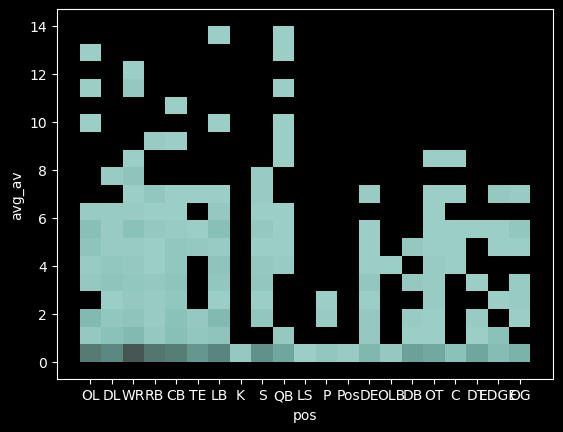

In [66]:
sns.histplot(data=draft_players, x="pos", y="avg_av")

Index(['player', 'pos', 'school', 'wt', '40yd', 'vertical', 'bench',
       'broad jump', '3cone', 'shuttle', 'round', 'ht_num', 'year', 'nfl_av',
       'avg_av', 'av_bin', 'group'],
      dtype='object')


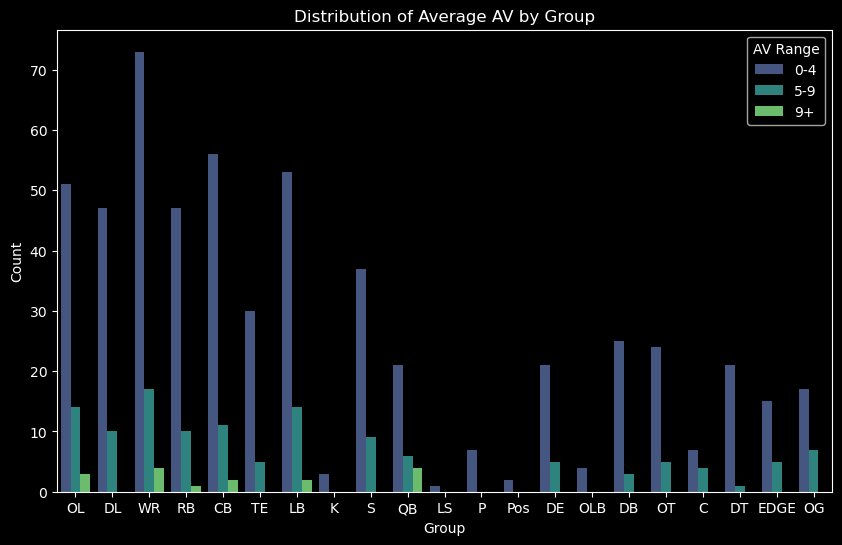

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Check DataFrame columns
print(draft_players.columns)  # Inspect available columns

# Step 2: Create a 'group' column if it doesn't exist
# Example: Group by position (adjust based on your data)
# Suppose 'position' is a column in draft_players
# offensive_positions = ["QB", "RB", "WR", "TE", "OL"]
# defensive_positions = ["DL", "LB", "DB"]
# special_teams_positions = ["K", "P"]


# def assign_group(position):
#     if position in offensive_positions:
#         return "Offense"
#     elif position in defensive_positions:
#         return "Defense"
#     elif position in special_teams_positions:
#         return "Special Teams"
#     else:
#         return "Other"  # Handle unexpected positions


# # Apply the grouping
# draft_players["group"] = draft_players["pos"].apply(assign_group)

# Step 3: Bin the avg_av values into 0-4, 5-9, 9+
bins = [0, 4, 9, float("inf")]  # Define bin edges
labels = ["0-4", "5-9", "9+"]  # Define bin labels
draft_players["av_bin"] = pd.cut(
    draft_players["avg_av"], bins=bins, labels=labels, include_lowest=True
)

# Step 4: Create a count plot
plt.figure(figsize=(10, 6))  # Set figure size
sns.countplot(
    data=draft_players,
    x="pos",
    hue="av_bin",
    palette="viridis",
)

# Step 5: Customize the plot
plt.title("Distribution of Average AV by Group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title="AV Range")

# Step 6: Show the plot
plt.show()

In [ ]:
pos_round = draft_players.groupby(["pos", "round"])["avg_av"].sum()

In [79]:
pos_round.head(60)

pos   round
C     1.0       8.333333
      2.0      11.416667
      3.0       5.666667
      4.0       4.000000
      5.0       0.000000
      6.0       0.000000
      7.0       0.000000
CB    1.0      41.466667
      2.0      40.683333
      3.0      19.550000
      4.0      22.250000
      5.0       0.000000
      6.0       0.000000
      7.0       4.666667
DB    1.0       6.750000
      2.0       8.500000
      3.0      13.250000
      4.0       0.750000
      5.0       0.000000
      6.0       0.000000
      7.0       0.000000
DE    1.0      27.083333
      2.0       7.333333
      3.0      10.333333
      4.0       6.833333
      5.0       0.000000
      6.0       0.000000
      7.0       0.000000
DL    1.0      33.100000
      2.0      21.000000
      3.0      35.150000
      4.0       8.400000
      5.0       0.000000
      6.0       0.000000
      7.0       0.000000
DT    1.0       8.833333
      2.0       0.666667
      3.0       4.333333
      4.0       1.833333
      5.0    

C: 2: 11.4, 1: 8.3, 3: 5.66
CB: 1: 41.5,


     pos  round    avg_av
0      C    1.0  8.333333
1      C    2.0  5.708333
2      C    3.0  5.666667
3     CB    2.0  4.068333
4     CB    1.0  3.769697
5     CB    3.0  3.258333
6     DB    2.0  2.833333
7     DB    1.0  1.687500
8     DB    3.0  1.656250
9     DE    1.0  5.416667
10    DE    2.0  3.666667
11    DE    4.0  2.277778
12    DL    1.0  4.728571
13    DL    3.0  2.929167
14    DL    2.0  2.333333
15    DT    1.0  2.944444
16    DT    3.0  2.166667
17    DT    2.0  0.666667
18  EDGE    1.0  6.305556
19  EDGE    2.0  2.385417
20  EDGE    3.0  1.000000
21     K    4.0  0.291667
22     K    6.0  0.000000
23    LB    1.0  6.146970
24    LB    2.0  3.150000
25    LB    3.0  2.743333
26    LS    6.0  0.000000
27    OG    4.0  5.833333
28    OG    2.0  5.500000
29    OG    1.0  3.937500
30    OL    2.0  5.892857
31    OL    1.0  4.509091
32    OL    3.0  3.014286
33   OLB    2.0  4.000000
34   OLB    1.0  0.000000
35   OLB    4.0  0.000000
36    OT    1.0  4.944444
37    OT    

/var/folders/8_/wmggdyf5497bw9n_2zgn9kzh0000gn/T/ipykernel_87179/1938526013.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "avg_av"))


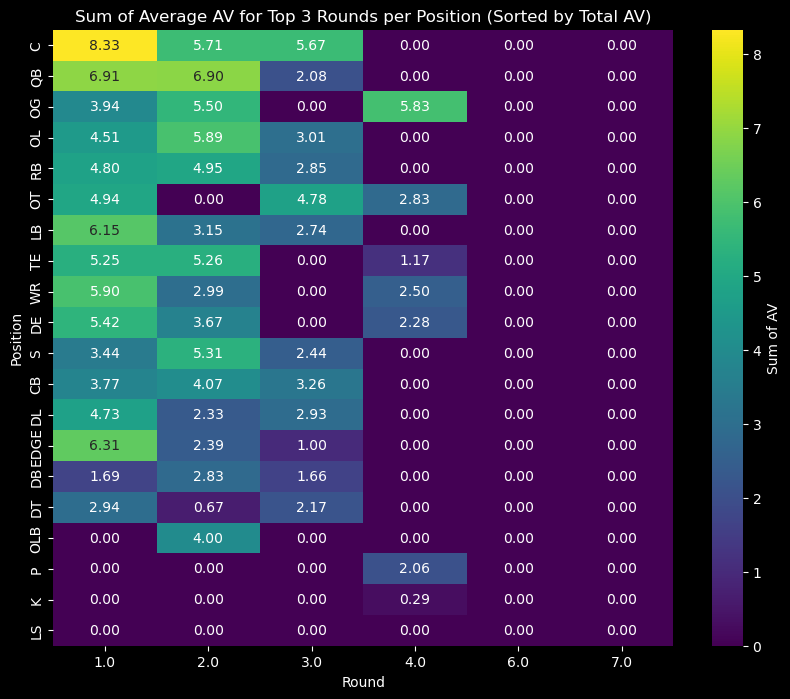

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming draft_players is your original DataFrame

# Step 1: Group by 'pos' and 'round' and sum 'avg_av'
pos_round = draft_players.groupby(["pos", "round"])["avg_av"].mean().reset_index()

# Step 2: For each position, sort by avg_av and select the top 3 rounds
pos_round_top3 = (
    pos_round.groupby("pos")
    .apply(lambda x: x.nlargest(3, "avg_av"))
    .reset_index(drop=True)
)

# Step 3: Print the filtered grouped data to verify
print(pos_round_top3)

# Step 4: Pivot the data for visualization (e.g., heatmap)
pivot_table = pos_round_top3.pivot(
    index="pos", columns="round", values="avg_av"
).fillna(0)

# Step 5: Sort positions by total avg_av (optional, for better visualization)
pos_order = (
    pos_round_top3.groupby("pos")["avg_av"]
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# Step 6: Plot a heatmap to visualize the summed avg_av for the top 3 rounds per position
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table.loc[pos_order],
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar_kws={"label": "Sum of AV"},
)
plt.title("Sum of Average AV for Top 3 Rounds per Position (Sorted by Total AV)")
plt.xlabel("Round")
plt.ylabel("Position")
plt.show()

    pos  round av_bin  count
0     C    1.0    5-9      1
1     C    1.0     9+      0
2     C    2.0    5-9      2
3     C    2.0     9+      0
4     C    3.0    5-9      1
..   ..    ...    ...    ...
121  WR    1.0     9+      3
122  WR    2.0    5-9      6
123  WR    2.0     9+      0
124  WR    4.0    5-9      2
125  WR    4.0     9+      1

[126 rows x 4 columns]


/var/folders/8_/wmggdyf5497bw9n_2zgn9kzh0000gn/T/ipykernel_87179/1230835477.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  draft_players.groupby(["pos", "round", "av_bin"]).size().reset_index(name="count")
/var/folders/8_/wmggdyf5497bw9n_2zgn9kzh0000gn/T/ipykernel_87179/1230835477.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(3, "count"))
/var/folders/8_/wmggdyf5497bw9n_2zgn9kzh0000gn/T/ipykernel_87179/1230835477.py:37: FutureWarning: The default value of observed=False is

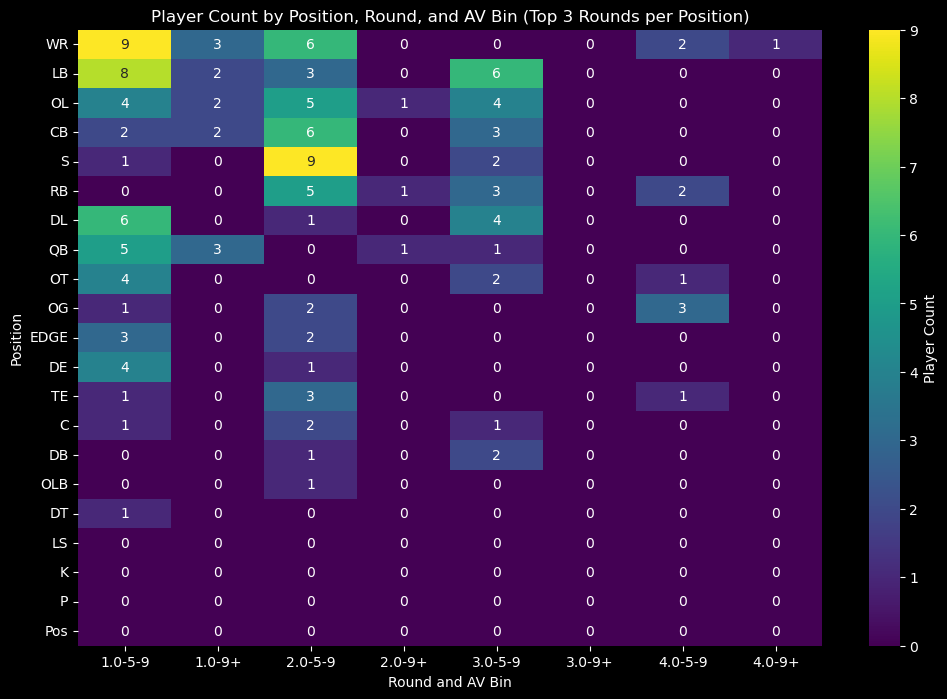

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Bin the avg_av values into 0-4, 5-9, 9+
bins = [4, 9, float("inf")]  # Define bin edges
labels = ["5-9", "9+"]  # Define bin labels
draft_players["av_bin"] = pd.cut(
    draft_players["avg_av"], bins=bins, labels=labels, include_lowest=True
)

# Step 2: Group by 'pos', 'round', and 'av_bin' and count the number of players
pos_round_bin = (
    draft_players.groupby(["pos", "round", "av_bin"]).size().reset_index(name="count")
)

# Step 3: Calculate total count per position and round (summing across bins)
pos_round_counts = pos_round_bin.groupby(["pos", "round"])["count"].sum().reset_index()

# Step 4: Select the top 3 rounds per position based on total player count
pos_round_top3 = (
    pos_round_counts.groupby("pos")
    .apply(lambda x: x.nlargest(3, "count"))
    .reset_index(drop=True)
)

# Step 5: Merge back with pos_round_bin to get the bin counts for the top 3 rounds
# This ensures we have the breakdown by bin for visualization
top3_with_bins = pos_round_bin.merge(
    pos_round_top3[["pos", "round"]], on=["pos", "round"], how="inner"
)

# Step 6: Print the filtered data to verify
print(top3_with_bins)

# Step 7: Pivot the data for visualization (e.g., heatmap of counts by bin)
pivot_table = top3_with_bins.pivot_table(
    index="pos", columns=["round", "av_bin"], values="count", fill_value=0
)

# Step 8: Sort positions by total count (optional, for better visualization)
pos_order = (
    pos_round_top3.groupby("pos")["count"]
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)

# Step 9: Plot a heatmap to visualize the counts for the top 3 rounds per position
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table.loc[pos_order],
    annot=True,
    fmt=".0f",
    cmap="viridis",
    cbar_kws={"label": "Player Count"},
)
plt.title("Player Count by Position, Round, and AV Bin (Top 3 Rounds per Position)")
plt.xlabel("Round and AV Bin")
plt.ylabel("Position")
plt.show()